# DispersionCurve

> Joseph P. Vantassel, The University of Texas at Austin

This file is intended as a gallery for the class `DispersionCurve` from `swprepost`.

## Table of Contents

- [DispersionCurve](#DispersionCurve)
    - [Creating a DispersionCurve](#Creating-a-DispersionCurve)
        - [DispersionCurve()](#DispersionCurve())
        - [from_simple_profiles()](#from_simple_profiles())
        - [from_geopsy()](#from_geopsy())    
    - [Working with a GroundModel](#Working-with-a-GroundModel)
        - [resample()](#resample())
        - [plotting](#plotting)

In [1]:
import swprepost
import numpy as np
import matplotlib.pyplot as plt

## Dispersion Curve

A `DispersionCurve` is defined by a set of `frequency` and `phase-velocity` values. Though as you will see you can equivalently represent a `DispersionCurve` object using `wavelegnth` rather than `frequency` and `slowness` rather than `phase-velocity`.

### Creating a DispersionCurve

#### DispersionCurve()

Create a custom `DispersionCurve` from `frequency` and `velocity` values.

In [2]:
frequency = [0.2,0.5,1,1.5,2,3,5,7,10,15,20,30]                      # Define frequency iterable in (Hz)
velocity = [500,500,400,325,300,250, 220, 200, 150, 100,100,100]     # Define velocity iterable in (m/s)

# Create DispersionCurve
dc = swprepost.DispersionCurve(frequency=frequency, velocity=velocity)

print(type(dc))   # View type is DispersionCurve
print(dc)         # View string representation

<class 'swprepost.dispersioncurve.DispersionCurve'>
DispersionCurve with 12 points


#### from_geopsy()

Create a `DispersionCurve` from a `.txt` file exported in the `Geopsy` format.

_Note: If the file contains multiple dispersion curves, this method will only read the first and ignore the rest. To capture all of the data see the `from_geopsy()`
method for the `DispersionSuite` object._

In [3]:
# Read DispersionCurve from Geopsy style file
dc = swprepost.DispersionCurve.from_geopsy("inputs/from_geopsy_dc.txt")

print(type(dc))   # View type is DispersionCurve
print(dc)         # View string representation

<class 'swprepost.dispersioncurve.DispersionCurve'>
DispersionCurve with 50 points


### Working with a DispersionCurve

#### plotting

Easily plot a `DispersionCurve`.

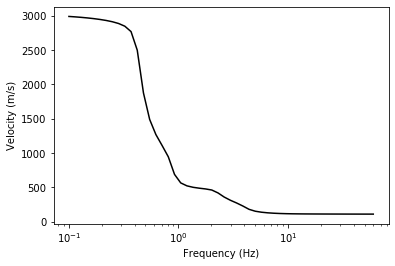

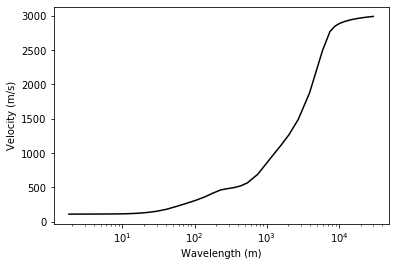

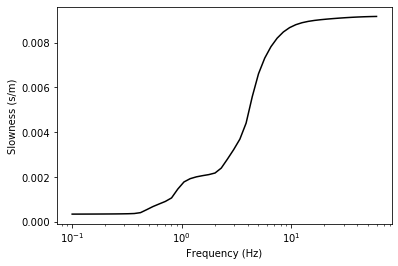

In [4]:
# Read DispersionCurve from Geopsy style file
dc = swprepost.DispersionCurve.from_geopsy("inputs/from_geopsy_dc.txt")

# Plot in terms of frequency-velocity
plt.plot(dc.frequency, dc.velocity, color="k")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (m/s)")
plt.show()

# Plot in terms of wavelength-velocity
plt.plot(dc.wavelength, dc.velocity, color="k")
plt.xscale("log")
plt.xlabel("Wavelength (m)")
plt.ylabel("Velocity (m/s)")
plt.show()

# Plot in terms of frequency-slowness
plt.plot(dc.frequency, dc.slowness, color="k")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Slowness (s/m)")
plt.show()

#### resample()

Easily resample a `DispersionCurve`. Can be done `inplace` if desired.

_Note: You can only resample with this method. You cannot extropolate._

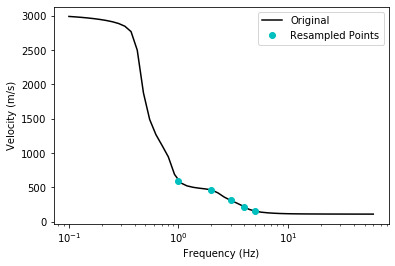

In [5]:
# Read DispersionCurve from Geopsy style file
dc = swprepost.DispersionCurve.from_geopsy("inputs/from_geopsy_dc.txt")

# Plot in terms of wavelength-velocity
plt.plot(dc.frequency, dc.velocity, color="k", label="Original")
plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (m/s)")

# Resample - inplace=False
new_frequency = [1,2,3,4,5]
new_frequency, new_velocity = dc.resample(xx=new_frequency, inplace=False)
plt.plot(new_frequency, new_velocity, marker="o", color="c", linestyle="", label="Resampled Points")

plt.legend()
plt.show()